<a href="https://colab.research.google.com/github/dongchimi12/KKJ/blob/main/%EC%B5%9C%EC%A2%85%20%EC%83%88%EB%A1%9C%EC%9A%B4%20gis%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%ED%8F%AC%ED%95%A8%20%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import font_manager, rc
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')   ## 링크 클릭해서 구글 로그인 한후에 드라이브에 데이터 넣고 [3]에 파일 이름만 바꿔주면 됨

Mounted at /content/drive


In [4]:
test = pd.read_csv('/content/drive/My Drive/contest/test.csv') ## 파일 test에 저장

In [77]:
test12 = pd.read_csv('/content/drive/My Drive/contest/store_test.csv', encoding = 'CP949')
test12

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3010000,3010000-104-2020-00245,20201229,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,10.00,100440.0,서울특별시 중구 황학동 2545 이마트 청계천점,서울특별시 중구 청계천로 400 지하2층 (황학동 롯데캐슬베네치아),4572.0,통불 이마트청계천점,20201229130352,I,2019-11-01 21:01:00.0,일반조리판매,201823.908977,452076.818664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3070000,3070000-104-2020-00105,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,6.60,136110.0,서울특별시 성북구 길음동 1280-6 대우상가,서울특별시 성북구 길음로 103 대우상가 상가동 1층 105106호 (길음동),2714.0,씨유 길음푸르지오점,20200713175725,I,2019-12-06 23:05:00.0,편의점,201517.385330,456504.561867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3230000,3230000-104-2020-00227,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,329.89,138827.0,서울특별시 송파구 방이동 44-3 현대토픽스,서울특별시 송파구 위례성대로 6 1층 (방이동),5544.0,스타벅스 몽촌토성역점,20200713162510,I,2019-12-06 23:05:00.0,커피숍,209929.574783,446085.121305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3050000,3050000-104-2020-00106,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,26.00,130850.0,서울특별시 동대문구 전농동 38-104,서울특별시 동대문구 전농로16길 54 1층 (전농동),2508.0,Min's coffee,20200713161446,I,2019-12-06 23:05:00.0,커피숍,205263.826419,452869.992526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3080000,3080000-104-2020-00065,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,32.00,142870.0,서울특별시 강북구 수유동 413-25,서울특별시 강북구 삼양로87길 46 1층 (수유동),1090.0,탑브릭스,20200713160435,I,2019-12-06 23:05:00.0,일반조리판매,201292.010942,459312.320008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112864,3220000,3220000-104-2015-00265,20150709,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,18.25,135080.0,서울특별시 강남구 역삼동 804,서울특별시 강남구 강남대로 지하 396 지하1층 E-44호 (역삼동 강남역지하도상가),6232.0,강다짐 원유로스페셜티 강남역 지하상가점,20210812132625,U,2020-12-07 23:04:00.0,커피숍,203319.729228,444338.162235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112865,3160000,3160000-104-2015-00062,20150625,NaN,3,폐업,2,폐업,20210812.0,NaN,NaN,NaN,NaN,6.60,152880.0,서울특별시 구로구 구로동 1126-34 1층,서울특별시 구로구 시흥대로 547 1층 (구로동 참튼튼병원),8392.0,참튼튼카페,20210812114337,U,2020-12-07 23:04:00.0,커피숍,191118.289292,442223.132052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112866,3110000,3110000-104-2012-00035,20120405,NaN,3,폐업,2,폐업,20210812.0,NaN,NaN,NaN,NaN,34.00,122891.0,서울특별시 은평구 신사동 335-26 1층,서울특별시 은평구 가좌로 275 1층 (신사동),3442.0,옛날칼국수 손만두,20210812115256,U,2020-12-07 23:04:00.0,일반조리판매,192271.770477,454519.009278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112867,3090000,3090000-104-2008-00032,20081001,NaN,3,폐업,2,폐업,20210812.0,NaN,NaN,NaN,02994 1944,16.65,132858.0,서울특별시 도봉구 쌍문동 38-4,서울특별시 도봉구 방학로3길 104 (쌍문동),1394.0,동그란샌드위치,20210812144936,U,2020-12-07 23:04:00.0,패스트푸드,203351.275770,461812.494787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
test22 = test12[['상세영업상태명', '사업장명', '좌표정보(X)', '좌표정보(Y)', '업태구분명']]
test22

,상세영업상태명,사업장명,좌표정보(X),좌표정보(Y),업태구분명
0,영업,통불 이마트청계천점,201823.908977,452076.818664,일반조리판매
1,영업,씨유 길음푸르지오점,201517.385330,456504.561867,편의점
2,영업,스타벅스 몽촌토성역점,209929.574783,446085.121305,커피숍
3,영업,Min's coffee,205263.826419,452869.992526,커피숍
4,영업,탑브릭스,201292.010942,459312.320008,일반조리판매
...,...,...,...,...,...
112864,영업,강다짐 원유로스페셜티 강남역 지하상가점,203319.729228,444338.162235,커피숍
112865,폐업,참튼튼카페,191118.289292,442223.132052,커피숍
112866,폐업,옛날칼국수 손만두,192271.770477,454519.009278,일반조리판매
112867,폐업,동그란샌드위치,203351.275770,461812.494787,패스트푸드


In [79]:
dftest = test22[~test22['상세영업상태명'].str.contains("폐업", na=False, case=False)]
dftest['좌표정보(X)'].replace('', np.nan, inplace=True)
dftest.dropna(subset=['좌표정보(X)'], inplace=True)

In [80]:
dftest

,상세영업상태명,사업장명,좌표정보(X),좌표정보(Y),업태구분명
0,영업,통불 이마트청계천점,201823.908977,452076.818664,일반조리판매
1,영업,씨유 길음푸르지오점,201517.385330,456504.561867,편의점
2,영업,스타벅스 몽촌토성역점,209929.574783,446085.121305,커피숍
3,영업,Min's coffee,205263.826419,452869.992526,커피숍
4,영업,탑브릭스,201292.010942,459312.320008,일반조리판매
...,...,...,...,...,...
112859,영업,메가엠지씨커피석계역점,205680.753860,456996.048176,커피숍
112860,영업,재순식당,202262.457856,444382.542260,커피숍
112862,영업,니토로스터스,193230.848944,444019.063597,커피숍
112864,영업,강다짐 원유로스페셜티 강남역 지하상가점,203319.729228,444338.162235,커피숍


In [88]:
fastfood = dftest.loc[dftest['업태구분명'].str.contains("패스트푸드", na = False)]

In [89]:
fastfood.to_csv('fastfood.csv',encoding='utf-8-sig')

In [5]:
test.head(5) ## 위에서 5행까지 출력 test용

,city,s_p_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,1041,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,536,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,355,74,73904,306625,111,84,774,19468.34722,3
3,강서구,747,70,257494,582950,179,175,745,36675.50926,10
4,관악구,538,75,115329,503171,108,113,998,32421.76042,4


In [6]:
test.info()
test.columns ## 행수 count , datatype
test.isnull().sum() ## 빈칸 찾기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         25 non-null     object 
 1   s_p_count    25 non-null     int64  
 2   e_count      25 non-null     int64  
 3   w_count      25 non-null     int64  
 4   people       25 non-null     int64  
 5   old          25 non-null     int64  
 6   park         25 non-null     int64  
 7   mart         25 non-null     int64  
 8   m_count      25 non-null     float64
 9   train_count  25 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.1+ KB


city           0
s_p_count      0
e_count        0
w_count        0
people         0
old            0
park           0
mart           0
m_count        0
train_count    0
dtype: int64

In [8]:
df = pd.DataFrame(test) ## pandas 이용 dataframe 생성
df

,city,s_p_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,1041,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,536,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,355,74,73904,306625,111,84,774,19468.34722,3
3,강서구,747,70,257494,582950,179,175,745,36675.50926,10
4,관악구,538,75,115329,503171,108,113,998,32421.76042,4
5,광진구,463,74,126305,355662,152,63,580,23538.24421,11
6,구로구,641,77,225668,425573,142,108,664,29573.02778,8
7,금천구,393,67,242686,244535,190,55,973,18836.52083,1
8,노원구,615,66,116684,520615,117,188,529,32596.36690,13
9,도봉구,372,74,72939,322745,149,80,539,19826.32986,3


In [9]:
corr = df.corr(method = 'pearson') ## 상관계수 분석 (전체)
corr

,s_p_count,e_count,w_count,people,old,park,mart,m_count,train_count
s_p_count,1.000000,0.076353,0.692487,0.734948,-0.355111,0.702304,-0.214954,0.922061,0.302740
e_count,0.076353,1.000000,0.069948,-0.135966,-0.110169,-0.073430,-0.085598,-0.020919,-0.215196
w_count,0.692487,0.069948,1.000000,0.133788,-0.158262,0.349522,0.315232,0.615844,0.556157
people,0.734948,-0.135966,0.133788,1.000000,-0.433861,0.723426,-0.571025,0.850602,0.095311
old,-0.355111,-0.110169,-0.158262,-0.433861,1.000000,-0.297652,0.218623,-0.422811,-0.149206
park,0.702304,-0.073430,0.349522,0.723426,-0.297652,1.000000,-0.263856,0.751372,0.363615
mart,-0.214954,-0.085598,0.315232,-0.571025,0.218623,-0.263856,1.000000,-0.292155,0.525210
m_count,0.922061,-0.020919,0.615844,0.850602,-0.422811,0.751372,-0.292155,1.000000,0.356152
train_count,0.302740,-0.215196,0.556157,0.095311,-0.149206,0.363615,0.525210,0.356152,1.000000


In [10]:
test_data = df[['s_p_count', 'm_count', 'people']]

In [11]:
tdf = df[['s_p_count', 'people','m_count']] ## 열 추출해서 가공
tdf

,s_p_count,people,m_count
0,1041,537024,49755.42593
1,536,469356,27327.69444
2,355,306625,19468.34722
3,747,582950,36675.50926
4,538,503171,32421.76042
5,463,355662,23538.24421
6,641,425573,29573.02778
7,393,244535,18836.52083
8,615,520615,32596.36690
9,372,322745,19826.32986


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


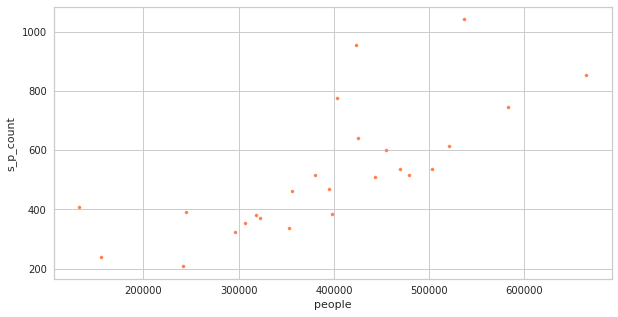

In [12]:
tdf.plot(kind='scatter', x='people', y='s_p_count',  c='coral', s=10, figsize=(10, 5))
plt.show()

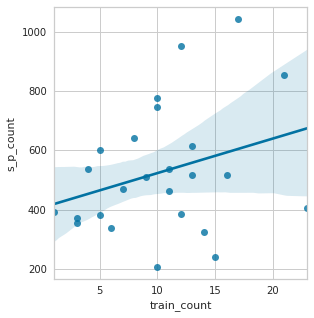

In [13]:
fig = plt.figure(figsize=(10, 5))  
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='train_count', y='s_p_count', data=df, ax=ax1)                 # 회귀선 표시
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


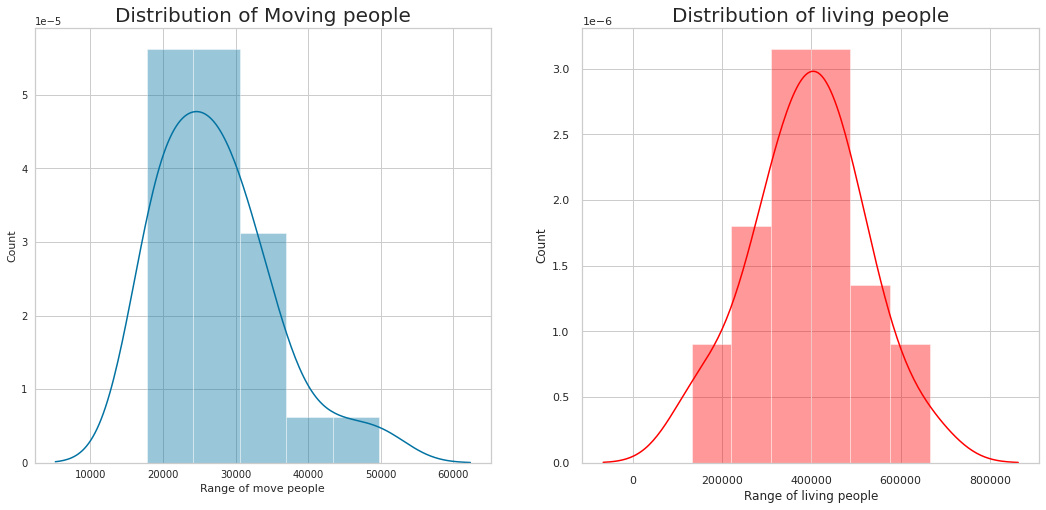

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(test_data['m_count'])
plt.title('Distribution of Moving people', fontsize = 20)
plt.xlabel('Range of move people')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(test_data['people'], color = 'red')
plt.title('Distribution of living people', fontsize = 20)
plt.xlabel('Range of living people')
plt.ylabel('Count')
plt.show()

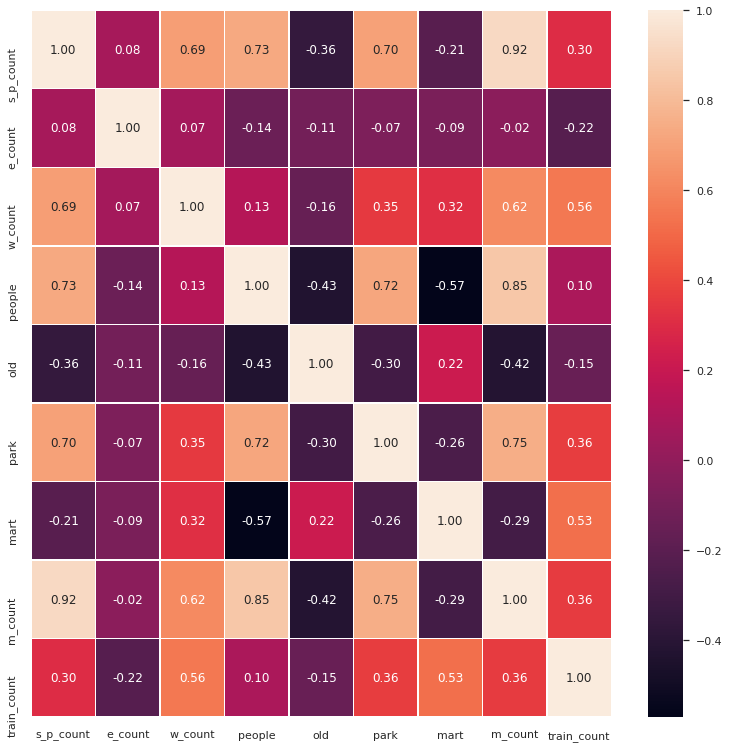

In [15]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

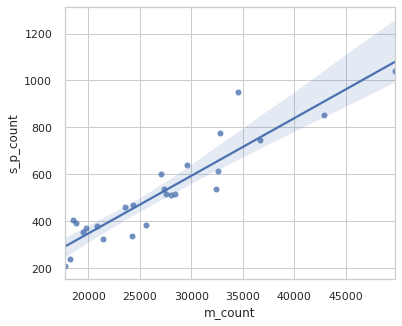

In [16]:
fig = plt.figure(figsize=(13, 5))   
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='m_count', y='s_p_count', data=test)                 # 회귀선 표시
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


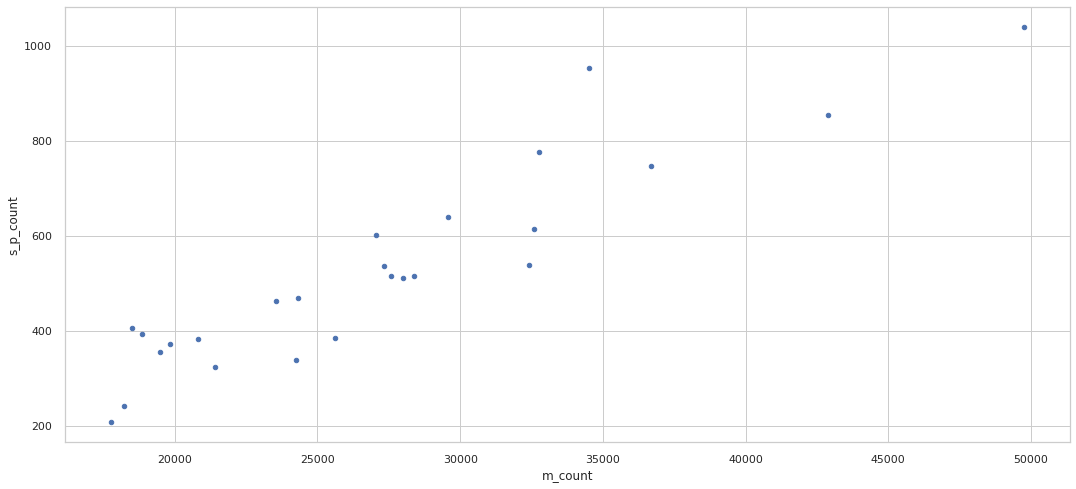

In [17]:
test.plot(kind = 'scatter', x = 'm_count', y = 's_p_count',)

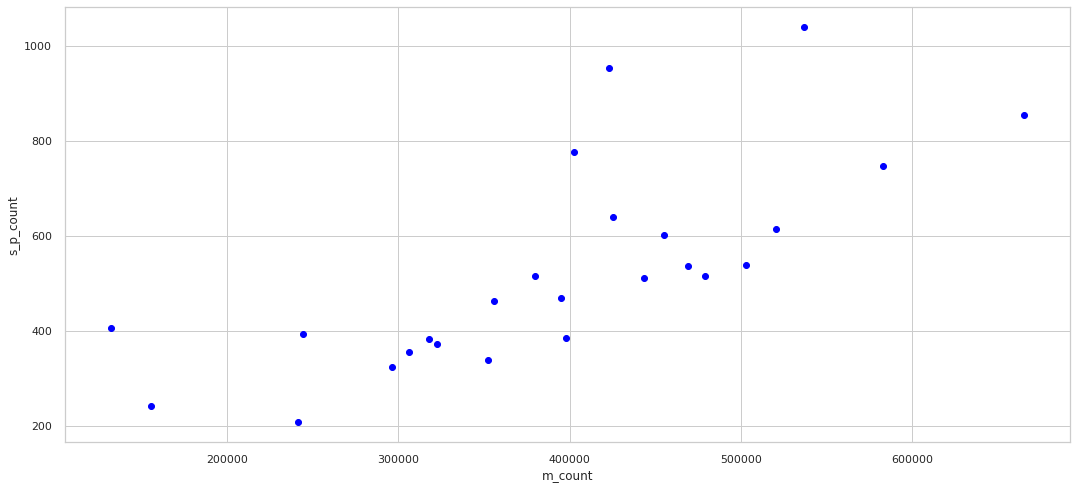

In [18]:
plt.xlabel('m_count')
plt.ylabel('s_p_count')
plt.scatter(x=tdf['people'], y=tdf['s_p_count'], c='blue',)

In [19]:
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

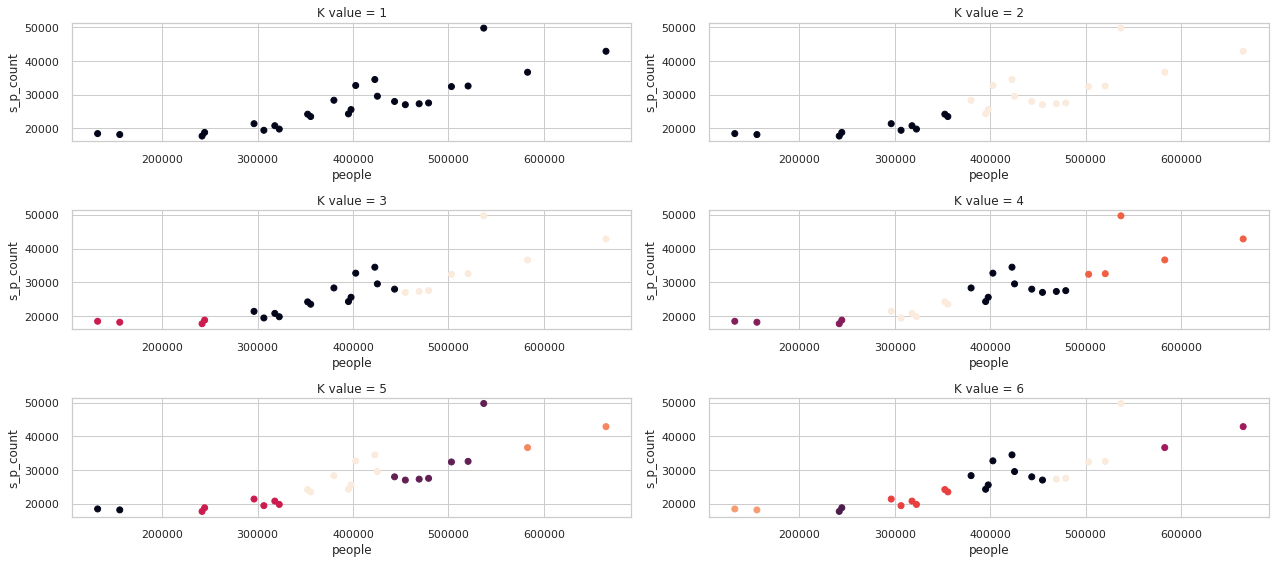

In [20]:
for i in range(1, 7):
    estimator = KMeans(n_clusters = i)
    idx = estimator.fit_predict(test_data[['people', 's_p_count']])
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i) 
    plt.subplot(3, 2, i)
    plt.tight_layout()
        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('people')
    plt.ylabel('s_p_count')
        # 클러스터링 그리기
    plt.scatter(test_data['people'], test_data['m_count'], c=idx)  
plt.show()

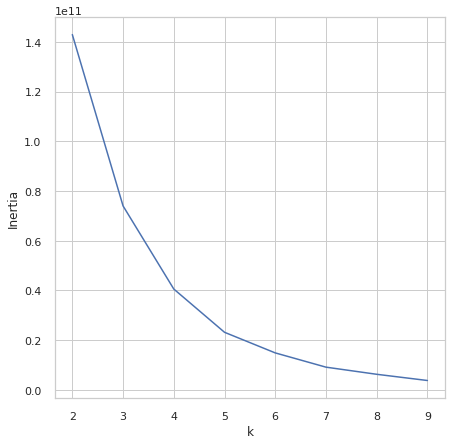

In [21]:
inertia_list = []
k_list = range(2,10)
for k in k_list:
  model = KMeans(n_clusters = k)
  model.fit(test_data)
  inertia_list.append(model.inertia_)

plt.figure(figsize = (7,7))
plt.plot(k_list, inertia_list)
plt.xlabel("k")
plt.ylabel('Inertia')
plt.show()

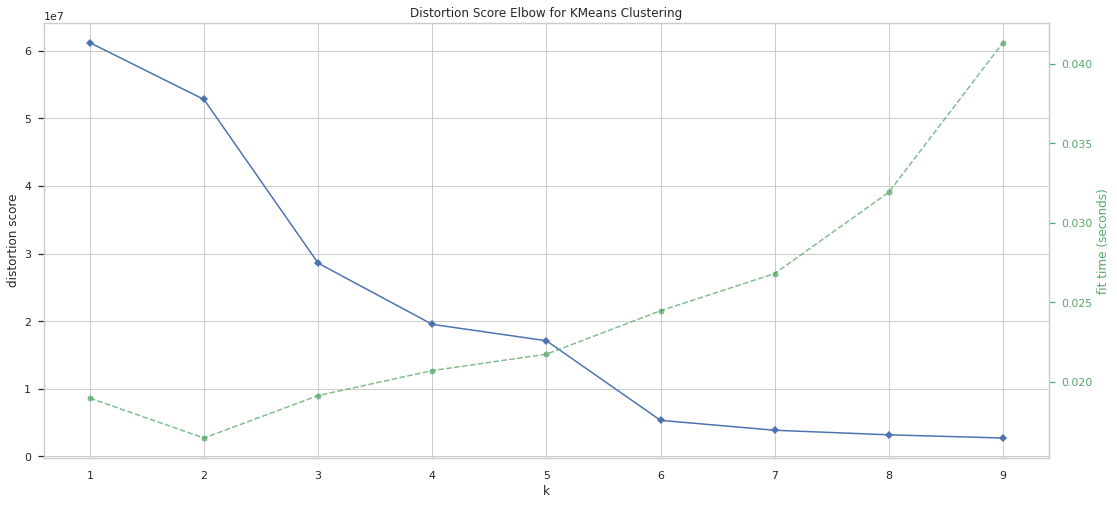

In [22]:
features = test_data.iloc[:, 1:2]
target = test_data.iloc[:, 0]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()

In [23]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[49755.42593  ],
       [24428.0225675],
       [33792.731252 ],
       [19354.4989875],
       [27983.391975 ],
       [42892.30093  ]])

In [24]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient = ', silhouette_avg)

silhouette coefficient =  0.6031046584172262


For n_clusters = 2 The average silhouette_score is : 0.5231186616035869
For n_clusters = 3 The average silhouette_score is : 0.4937946633048169
For n_clusters = 4 The average silhouette_score is : 0.4981452239179848
For n_clusters = 5 The average silhouette_score is : 0.5103549243252271
For n_clusters = 6 The average silhouette_score is : 0.5433120127432113
For n_clusters = 7 The average silhouette_score is : 0.5229858189603922
For n_clusters = 8 The average silhouette_score is : 0.5234152635382858
For n_clusters = 9 The average silhouette_score is : 0.5483045096799504
For n_clusters = 10 The average silhouette_score is : 0.5603474717753536


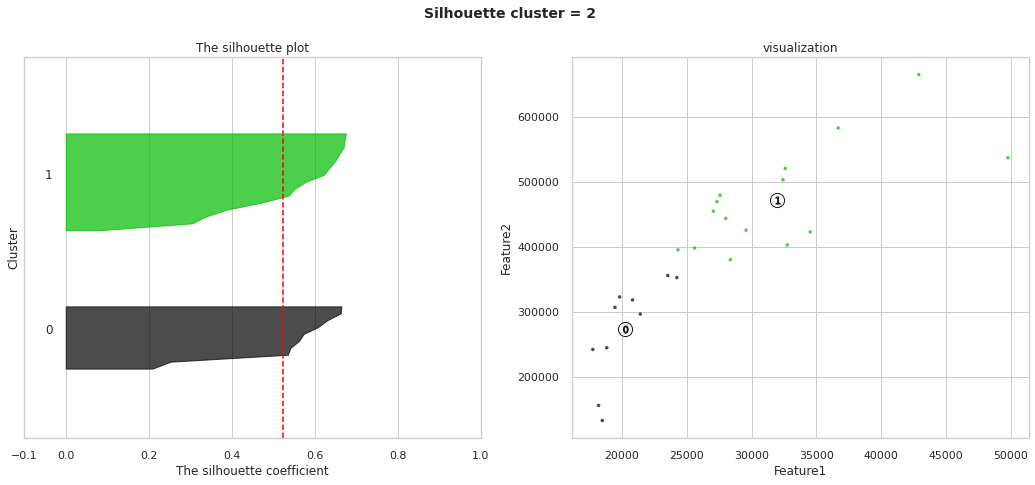

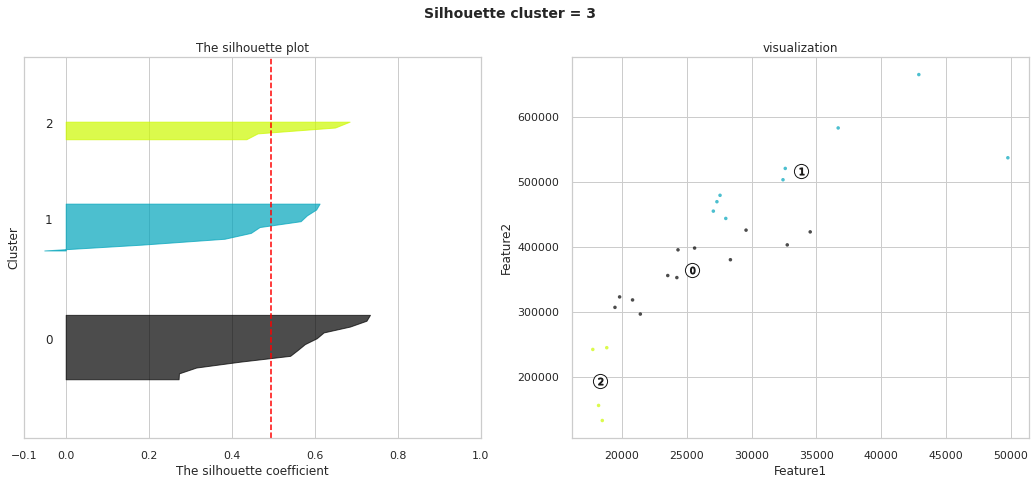

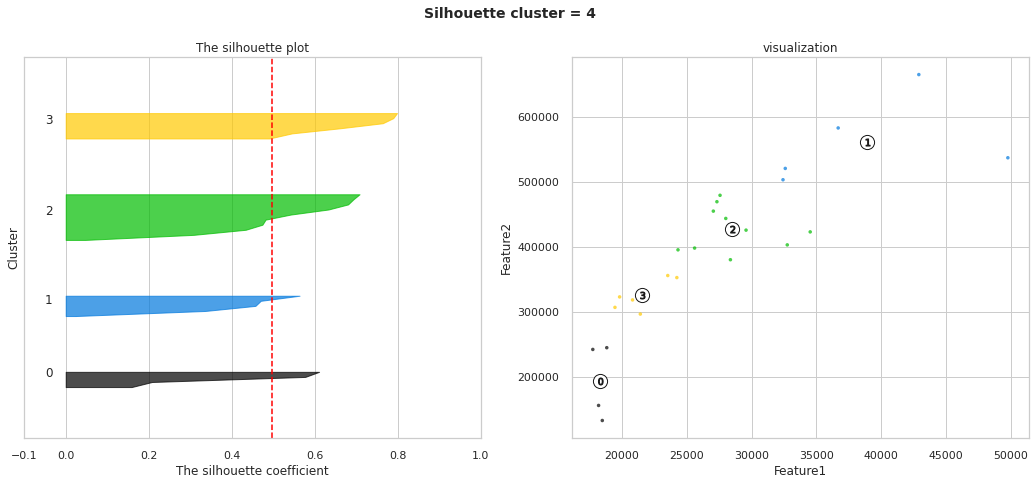

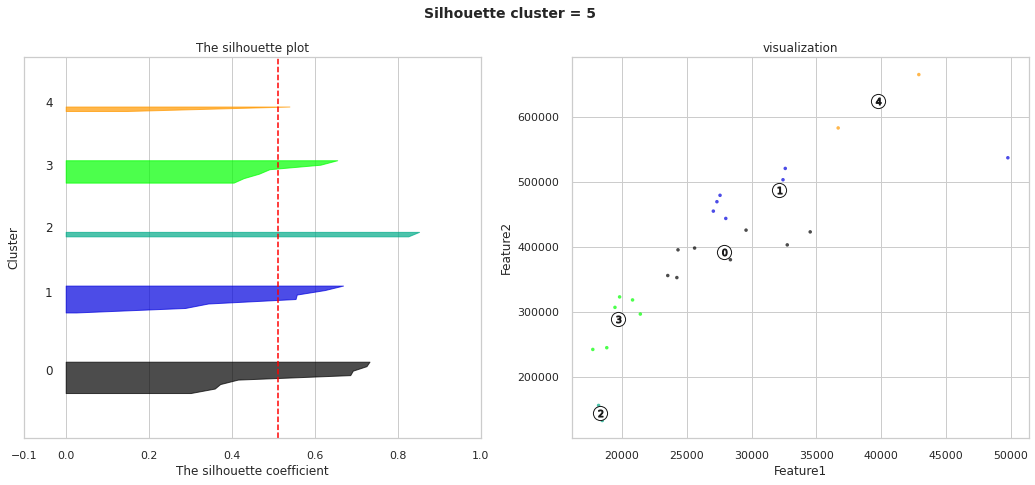

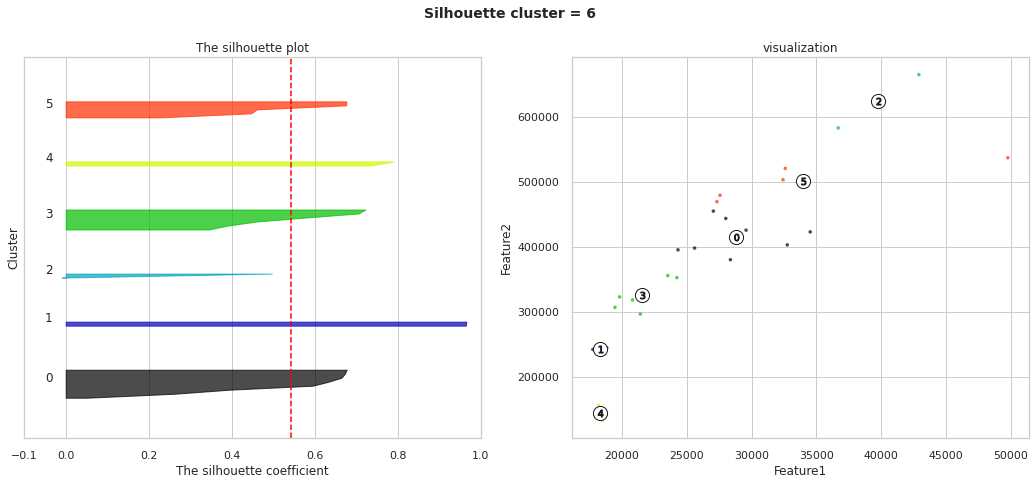

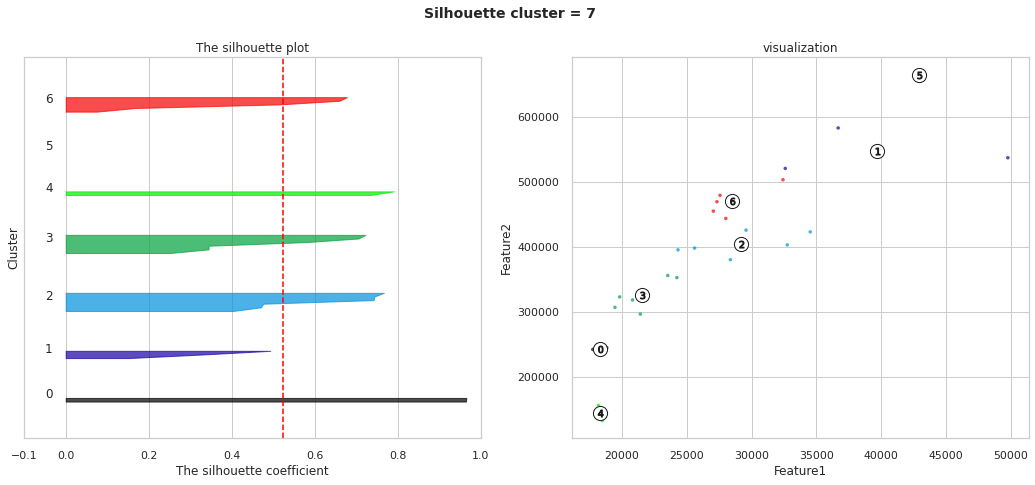

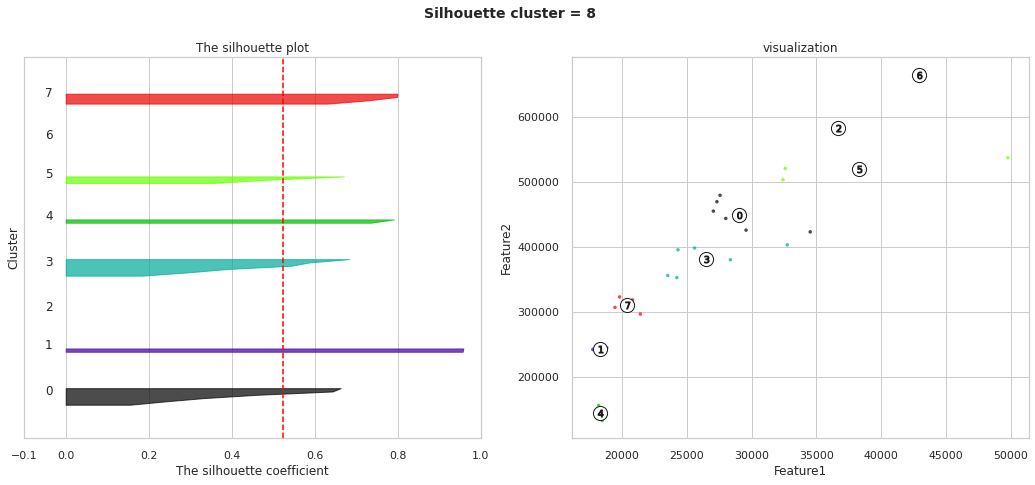

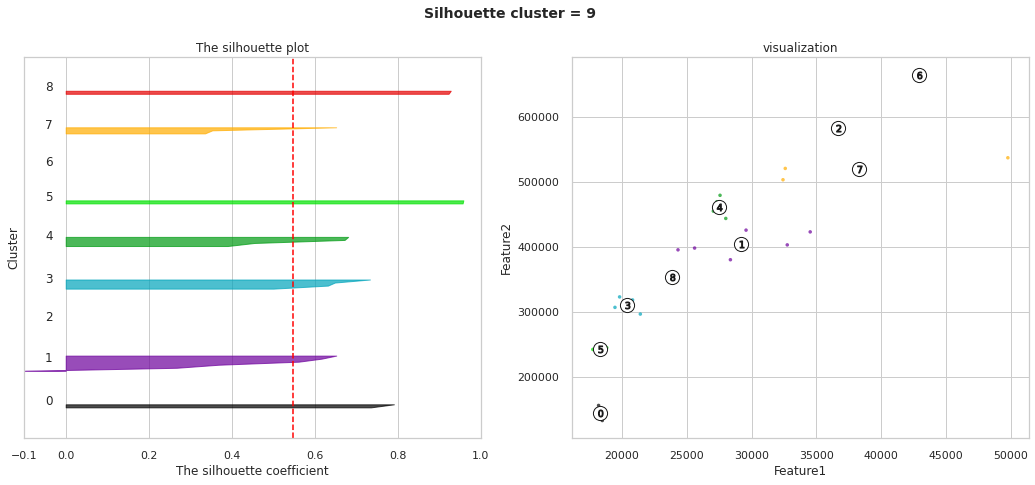

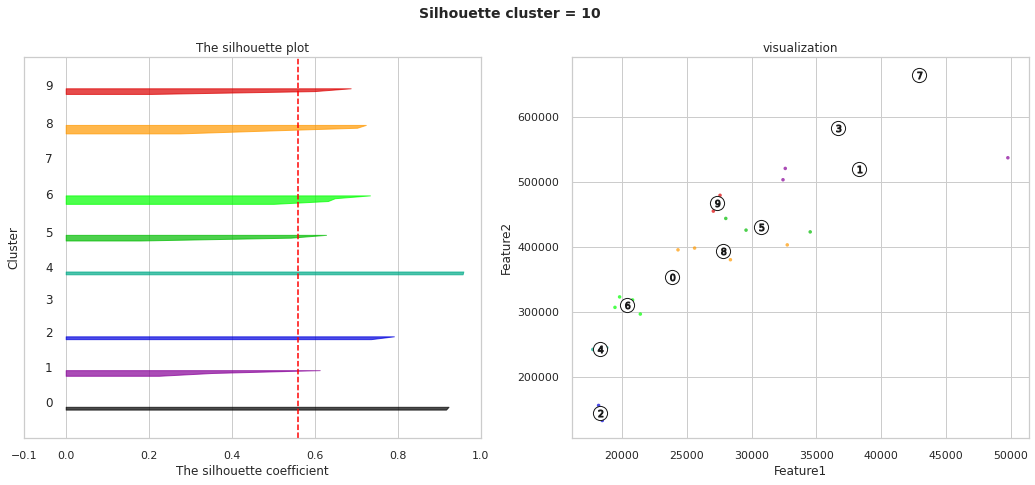

In [25]:
test_data = df[['s_p_count', 'm_count', 'people']]
test1 = test_data[['people', 's_p_count']]
test2 = test_data[['m_count', 's_p_count']]
test3 = test_data[['m_count', 'people']]
x = test3.iloc[:,[0,1]].values

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot")
    ax1.set_xlabel("The silhouette coefficient")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization")
    ax2.set_xlabel("Feature1")
    ax2.set_ylabel("Feature2")

    plt.suptitle(("Silhouette cluster = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [26]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.4


In [27]:
estimator = KMeans(n_clusters = 6)

In [28]:
cluster_idx = estimator.fit_predict(test_data[['people', 'm_count']])

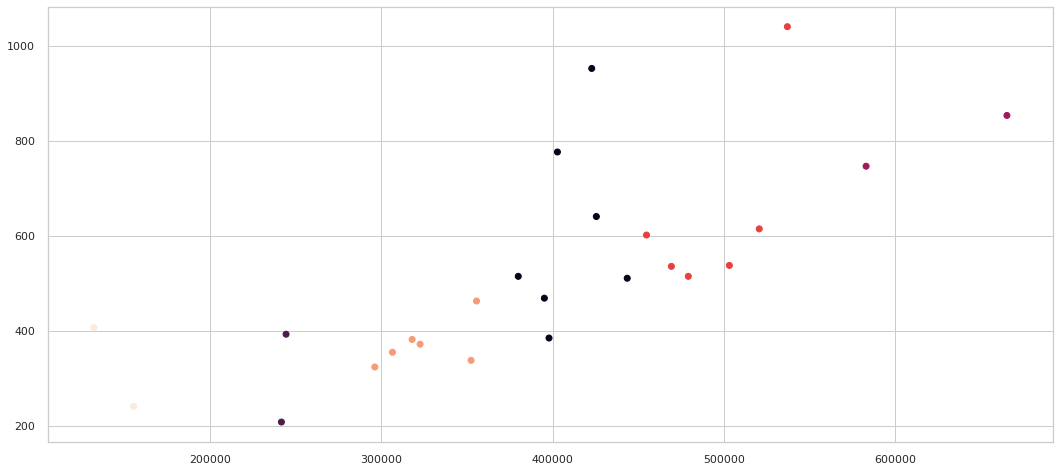

In [29]:
plt.scatter(test_data['people'], test_data['s_p_count'], c=cluster_idx)

In [30]:
test_data2 = test_data[['m_count', 'people', 'people']]
x = test_data2.iloc[:, [0, 1]].values

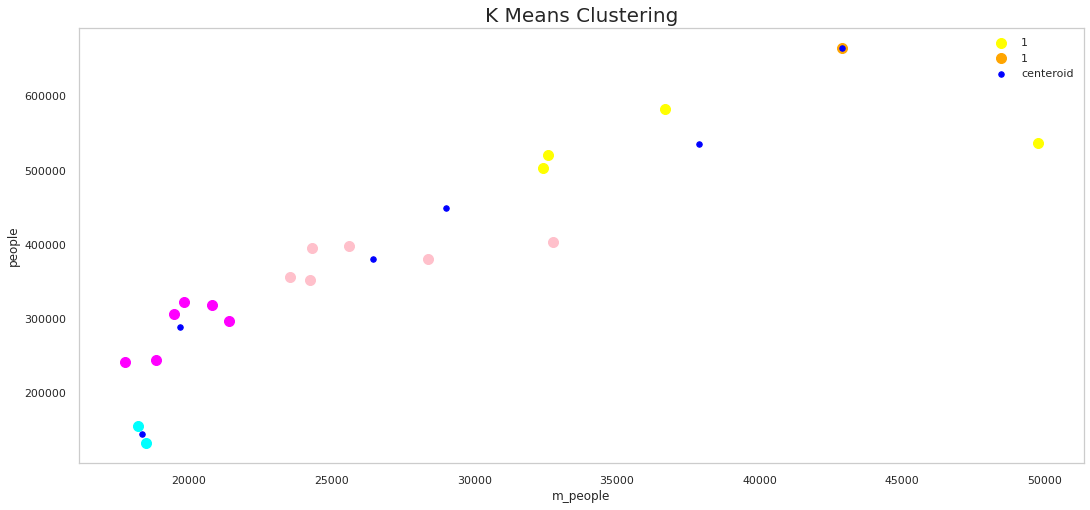

In [31]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = '1')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 30, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('m_people')
plt.ylabel('people')
plt.legend()
plt.grid()
plt.show() # >> 인구수 유동인구 많은 군집으로 1순위 선정

In [32]:
AHP = pd.read_csv('/content/drive/My Drive/contest/AHP.csv', encoding='cp949')
AHP

,city,result,rank
0,강남구,0.250,7
1,강동구,0.240,8
2,강북구,0.154,22
3,강서구,0.282,3
4,관악구,0.258,6
5,광진구,0.192,17
6,구로구,0.218,13
7,금천구,0.106,25
8,노원구,0.302,2
9,도봉구,0.154,22
